# Python Data Analyis

## Import all necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Series

In [ ]:
np.random.randn(5)

In [ ]:
labels = ['a', 'b', 'c', 'd', 'e']
s = pd.Series(np.random.randn(5), index=labels)
'b' in s

In [ ]:
s['b']

In [ ]:
s.to_dict()

In [ ]:
s = pd.Series(s.to_dict(), index=['b', 'e', 'a', 'd', 'f'])
s

In [ ]:
s.dropna()

In [ ]:
s * 2

In [ ]:
s[3:]

In [ ]:
s[:3]

In [ ]:
s.index

## DataFrame: 2D collection of Series

In [ ]:
df = pd.DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)})
df['d'] = range(6)
df

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
df['b']    # by column

In [ ]:
df[:3]

In [ ]:
df[:-2]

In [ ]:
df[-2:]   # the last 2 rows

In [ ]:
df[['a','b']]

In [ ]:
df.loc[2]    # does equal thing as above. In this case, 3rd row. 

In [ ]:
df.loc[2, 'b']

In [ ]:
df.loc[2:4, 'b']

In [ ]:
df.loc[2:4, ['b', 'c']]

In [ ]:
df.loc[2:4, 'b':'c']   # slices by column - essentially the same as above.

In [ ]:
df.loc[[0, 2, 4], ['b', 'c', 'd']]   # pass a list of rows and columns I want to select out

In [ ]:
df['c'] > 0

In [ ]:
df.loc[df['c'] > 0]   # boolean arrays

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.T

In [ ]:
df.T.T

In [ ]:
df['a'].dot(df['a'])

## Hierarchical indexing

In [ ]:
index = pd.MultiIndex(levels=[['foo', 'bar', 'baz', 'qux'],
                                   ['one', 'two', 'three']],
                           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3, 3],
                                   [0, 1, 2, 0, 1, 1, 2, 0, 1, 2]])
hdf = pd.DataFrame(np.random.randn(10, 3), index=index,
                columns=['A', 'B', 'C'])
hdf

In [ ]:
hdf.loc['foo']

In [ ]:
hdf.loc['bar','one']['A']

## Working with real dataset 

In [2]:
data = pd.read_csv("store_sales.txt")

In [3]:
data

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date
0,928,3/1/2011,Low,26,390.2000,Express Air,7.40,British Columbia,Consumer,Furniture,Office Furnishings,Small Box,3/3/2011
1,32323,7/23/2010,High,38,259.7175,Regular Air,5.03,Ontario,Small Business,Technology,Telephones and Communication,Medium Box,7/25/2010
2,48353,12/15/2012,Not Specified,18,71.2200,Regular Air,0.70,British Columbia,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,12/17/2012
3,10144,1/2/2011,Critical,1,192.4900,Delivery Truck,30.00,British Columbia,Corporate,Furniture,Chairs & Chairmats,Jumbo Drum,1/4/2011
4,26756,5/10/2012,Medium,25,767.2600,Regular Air,4.00,British Columbia,Home Office,Technology,Computer Peripherals,Small Box,5/10/2012
5,18144,6/7/2011,Critical,48,207.0800,Regular Air,5.17,Northwest Territories,Corporate,Office Supplies,Paper,Small Box,6/9/2011
6,10369,11/9/2011,Low,23,683.6800,Regular Air,8.99,British Columbia,Home Office,Technology,Computer Peripherals,Small Pack,11/14/2011
7,22912,10/16/2010,Low,33,10168.2300,Express Air,19.99,Yukon,Corporate,Office Supplies,Binders and Binder Accessories,Small Box,10/20/2010
8,51008,8/20/2011,High,20,269.6600,Regular Air,4.59,Quebec,Consumer,Office Supplies,"Scissors, Rulers and Trimmers",Wrap Bag,8/22/2011
9,18279,2/26/2009,Medium,20,10281.7900,Regular Air,24.49,Alberta,Consumer,Technology,Copiers and Fax,Large Box,2/27/2009


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
Order ID                8399 non-null int64
Order Date              8399 non-null object
Order Priority          8399 non-null object
Order Quantity          8399 non-null int64
Sales                   8399 non-null float64
Ship Mode               8399 non-null object
Shipping Cost           8399 non-null float64
Province                8399 non-null object
Customer Segment        8399 non-null object
Product Category        8399 non-null object
Product Sub-Category    8399 non-null object
Product Container       8399 non-null object
Ship Date               8399 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 853.1+ KB


In [5]:
data.describe()

,Order ID,Order Quantity,Sales,Shipping Cost
count,8399.000000,8399.000000,8399.000000,8399.000000
mean,29965.179783,25.571735,1775.878179,12.838557
std,17260.883447,14.481071,3585.050525,17.264052
min,3.000000,1.000000,2.240000,0.490000
25%,15011.500000,13.000000,143.195000,3.300000
50%,29857.000000,26.000000,449.420000,6.070000
75%,44596.000000,38.000000,1709.320000,13.990000
max,59973.000000,50.000000,89061.050000,164.730000


In [6]:
data['Sales'].sum()

14915600.823999992

In [7]:
data[(data['Province'] == 'Yukon')]

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date
7,22912,10/16/2010,Low,33,10168.2300,Express Air,19.99,Yukon,Corporate,Office Supplies,Binders and Binder Accessories,Small Box,10/20/2010
25,31939,6/25/2011,High,13,1506.8375,Regular Air,4.20,Yukon,Small Business,Technology,Telephones and Communication,Small Box,6/27/2011
27,13536,8/18/2009,Medium,23,123.1500,Regular Air,2.04,Yukon,Home Office,Office Supplies,Paper,Wrap Bag,8/20/2009
53,25797,9/1/2012,Not Specified,28,925.4300,Regular Air,1.99,Yukon,Corporate,Technology,Computer Peripherals,Small Pack,9/3/2012
79,55299,3/30/2012,Low,20,22.2800,Regular Air,0.70,Yukon,Corporate,Office Supplies,Rubber Bands,Wrap Bag,3/30/2012
84,42115,2/18/2012,Critical,21,673.9200,Regular Air,1.99,Yukon,Home Office,Technology,Computer Peripherals,Small Pack,2/18/2012
87,12007,9/27/2009,Not Specified,42,152.2600,Regular Air,0.50,Yukon,Corporate,Office Supplies,Labels,Small Box,9/29/2009
124,14851,5/11/2012,Not Specified,26,1443.2660,Regular Air,8.99,Yukon,Corporate,Technology,Telephones and Communication,Small Box,5/13/2012
128,30848,5/1/2011,Medium,13,4324.2900,Delivery Truck,40.19,Yukon,Corporate,Furniture,Tables,Jumbo Box,5/3/2011
145,50786,10/12/2009,Low,4,487.7200,Delivery Truck,14.00,Yukon,Consumer,Technology,Office Machines,Jumbo Drum,10/19/2009


In [8]:
data[['Province', 'Product Category']]

,Province,Product Category
0,British Columbia,Furniture
1,Ontario,Technology
2,British Columbia,Office Supplies
3,British Columbia,Furniture
4,British Columbia,Technology
5,Northwest Territories,Office Supplies
6,British Columbia,Technology
7,Yukon,Office Supplies
8,Quebec,Office Supplies
9,Alberta,Technology


In [9]:
data[['Province', 'Product Category']].drop_duplicates()

,Province,Product Category
0,British Columbia,Furniture
1,Ontario,Technology
2,British Columbia,Office Supplies
4,British Columbia,Technology
5,Northwest Territories,Office Supplies
7,Yukon,Office Supplies
8,Quebec,Office Supplies
9,Alberta,Technology
10,Saskachewan,Office Supplies
11,Prince Edward Island,Technology


In [10]:
data.groupby(['Province', 'Product Category'])

In [11]:
data.groupby(['Province', 'Product Category']).groups

{('Alberta',
  'Furniture'): Int64Index([  38,  103,  118,  121,  149,  183,  214,  215,  301,  339,
             ...
             7826, 7832, 7867, 7874, 7896, 8005, 8058, 8237, 8255, 8315],
            dtype='int64', length=171),
 ('Alberta',
  'Office Supplies'): Int64Index([  48,   56,   65,  122,  133,  155,  160,  283,  291,  310,
             ...
             8205, 8208, 8216, 8240, 8250, 8329, 8350, 8365, 8387, 8390],
            dtype='int64', length=464),
 ('Alberta',
  'Technology'): Int64Index([   9,   49,   63,   66,   77,  130,  141,  166,  231,  257,
             ...
             8145, 8147, 8171, 8202, 8204, 8232, 8242, 8270, 8319, 8396],
            dtype='int64', length=230),
 ('British Columbia',
  'Furniture'): Int64Index([   0,    3,   13,   60,  114,  181,  234,  325,  357,  391,
             ...
             8184, 8196, 8248, 8272, 8273, 8290, 8305, 8309, 8359, 8361],
            dtype='int64', length=234),
 ('British Columbia',
  'Office Supplies'): Int64Index([

In [12]:
data.groupby(['Province', 'Product Category']).groups.keys()

dict_keys([('Alberta', 'Furniture'), ('Alberta', 'Office Supplies'), ('Alberta', 'Technology'), ('British Columbia', 'Furniture'), ('British Columbia', 'Office Supplies'), ('British Columbia', 'Technology'), ('Manitoba', 'Furniture'), ('Manitoba', 'Office Supplies'), ('Manitoba', 'Technology'), ('New Brunswick', 'Furniture'), ('New Brunswick', 'Office Supplies'), ('New Brunswick', 'Technology'), ('Newfoundland', 'Furniture'), ('Newfoundland', 'Office Supplies'), ('Newfoundland', 'Technology'), ('Northwest Territories', 'Furniture'), ('Northwest Territories', 'Office Supplies'), ('Northwest Territories', 'Technology'), ('Nova Scotia', 'Furniture'), ('Nova Scotia', 'Office Supplies'), ('Nova Scotia', 'Technology'), ('Nunavut', 'Furniture'), ('Nunavut', 'Office Supplies'), ('Nunavut', 'Technology'), ('Ontario', 'Furniture'), ('Ontario', 'Office Supplies'), ('Ontario', 'Technology'), ('Prince Edward Island', 'Furniture'), ('Prince Edward Island', 'Office Supplies'), ('Prince Edward Island'

In [ ]:
len(data.groupby(['Province', 'Product Category']).groups[('Alberta', 'Furniture')])

In [13]:
data.groupby(['Province', 'Product Category']).agg({'Sales':'sum'})

Sales
Province              Product Category              
Alberta               Furniture         5.327443e+05
                      Office Supplies   3.194548e+05
                      Technology        8.525925e+05
British Columbia      Furniture         6.402451e+05
                      Office Supplies   4.780560e+05
                      Technology        7.744567e+05
Manitoba              Furniture         5.116348e+05
                      Office Supplies   3.344119e+05
                      Technology        5.268021e+05
New Brunswick         Furniture         1.431296e+05
                      Office Supplies   1.796133e+05
                      Technology        3.614687e+05
Newfoundland          Furniture         5.382918e+04
                      Office Supplies   2.385716e+04
                      Technology        2.523773e+04
Northwest Territories Furniture         2.828379e+05
                      Office Supplies   2.168489e+05
                      Technology        3.011605e+05
Nova Scotia           Furniture         3.406439e+05
                      Office Supplies   1.792060e+05
                      Technology        2.978795e+05
Nunavut               Furniture         4.354561e+04
                      Office Supplies   3.861547e+04
                      Technology        3.421540e+04
Ontario               Furniture         1.109617e+06
                      Office Supplies   9.274313e+05
                      Technology        1.026164e+06
Prince Edward Island  Furniture         1.711241e+05
                      Office Supplies   9.578797e+04
                      Technology        1.424712e+05
Quebec                Furniture         6.057841e+05
                      Office Supplies   3.518227e+05
                      Technology        5.525883e+05
Saskachewan           Furniture         4.075563e+05
                      Office Supplies   3.856785e+05
                      Technology        6.712210e+05
Yukon                 Furniture         3.358981e+05
                      Office Supplies   2.219782e+05
                      Technology        4.179911e+05

In [14]:
data.groupby(['Province', 'Product Category']).agg({'Sales':['sum', 'mean']})

Sales             
                                                 sum         mean
Province              Product Category                           
Alberta               Furniture         5.327443e+05  3115.463567
                      Office Supplies   3.194548e+05   688.480108
                      Technology        8.525925e+05  3706.923700
British Columbia      Furniture         6.402451e+05  2736.090274
                      Office Supplies   4.780560e+05   777.326813
                      Technology        7.744567e+05  2795.872457
Manitoba              Furniture         5.116348e+05  3119.724500
                      Office Supplies   3.344119e+05   777.702070
                      Technology        5.268021e+05  2647.246603
New Brunswick         Furniture         1.431296e+05  2271.897778
                      Office Supplies   1.796133e+05   986.886264
                      Technology        3.614687e+05  4634.213635
Newfoundland          Furniture         5.382918e+04  3588.612133
                      Office Supplies   2.385716e+04   507.599149
                      Technology        2.523773e+04  1261.886275
Northwest Territories Furniture         2.828379e+05  3327.504800
                      Office Supplies   2.168489e+05  1037.554689
                      Technology        3.011605e+05  3011.604915
Nova Scotia           Furniture         3.406439e+05  3406.439200
                      Office Supplies   1.792060e+05   734.450779
                      Technology        2.978795e+05  2482.328771
Nunavut               Furniture         4.354561e+04  3349.662615
                      Office Supplies   3.861547e+04   772.309400
                      Technology        3.421540e+04  2138.462469
Ontario               Furniture         1.109617e+06  2837.896419
                      Office Supplies   9.274313e+05   929.289830
                      Technology        1.026164e+06  2348.200754
Prince Edward Island  Furniture         1.711241e+05  3355.374902
                      Office Supplies   9.578797e+04   870.799727
                      Technology        1.424712e+05  2849.423200
Quebec                Furniture         6.057841e+05  3563.436141
                      Office Supplies   3.518227e+05   799.597000
                      Technology        5.525883e+05  3231.510269
Saskachewan           Furniture         4.075563e+05  2595.900051
                      Office Supplies   3.856785e+05   731.837837
                      Technology        6.712210e+05  2931.095945
Yukon                 Furniture         3.358981e+05  3053.618855
                      Office Supplies   2.219782e+05   755.027755
                      Technology        4.179911e+05  3028.921283

In [15]:
data.groupby(['Province', 'Product Category']).agg({'Sales':['sum', 'mean', lambda x: x.max()]})

Sales                         
                                                 sum         mean    <lambda>
Province              Product Category                                       
Alberta               Furniture         5.327443e+05  3115.463567  28389.1400
                      Office Supplies   3.194548e+05   688.480108  21752.0100
                      Technology        8.525925e+05  3706.923700  27720.9800
British Columbia      Furniture         6.402451e+05  2736.090274  20701.9280
                      Office Supplies   4.780560e+05   777.326813  23516.3100
                      Technology        7.744567e+05  2795.872457  29884.6000
Manitoba              Furniture         5.116348e+05  3119.724500  29345.2700
                      Office Supplies   3.344119e+05   777.702070  16269.8200
                      Technology        5.268021e+05  2647.246603  28761.5200
New Brunswick         Furniture         1.431296e+05  2271.897778  14567.1500
                      Office Supplies   1.796133e+05   986.886264  20175.4800
                      Technology        3.614687e+05  4634.213635  89061.0500
Newfoundland          Furniture         5.382918e+04  3588.612133  12098.8700
                      Office Supplies   2.385716e+04   507.599149   4115.7400
                      Technology        2.523773e+04  1261.886275   4373.8535
Northwest Territories Furniture         2.828379e+05  3327.504800  26133.3900
                      Office Supplies   2.168489e+05  1037.554689  23792.9300
                      Technology        3.011605e+05  3011.604915  22079.4700
Nova Scotia           Furniture         3.406439e+05  3406.439200  28180.0800
                      Office Supplies   1.792060e+05   734.450779  12569.3100
                      Technology        2.978795e+05  2482.328771  25312.0000
Nunavut               Furniture         4.354561e+04  3349.662615  14223.8200
                      Office Supplies   3.861547e+04   772.309400  10123.0200
                      Technology        3.421540e+04  2138.462469  12028.2300
Ontario               Furniture         1.109617e+06  2837.896419  21425.9100
                      Office Supplies   9.274313e+05   929.289830  23106.4600
                      Technology        1.026164e+06  2348.200754  24051.4900
Prince Edward Island  Furniture         1.711241e+05  3355.374902  20333.8160
                      Office Supplies   9.578797e+04   870.799727   9293.8200
                      Technology        1.424712e+05  2849.423200  23255.6100
Quebec                Furniture         6.057841e+05  3563.436141  24701.1200
                      Office Supplies   3.518227e+05   799.597000  25409.6300
                      Technology        5.525883e+05  3231.510269  45923.7600
Saskachewan           Furniture         4.075563e+05  2595.900051  14493.8400
                      Office Supplies   3.856785e+05   731.837837  17853.6400
                      Technology        6.712210e+05  2931.095945  41343.2100
Yukon                 Furniture         3.358981e+05  3053.618855  17248.0900
                      Office Supplies   2.219782e+05   755.027755  10223.1900
                      Technology        4.179911e+05  3028.921283  23949.5100

In [16]:
def get_range(x):
    return x.max() - x.min()
data.groupby(['Province', 'Product Category']).agg({'Sales':['sum', 'mean', get_range]})

Sales                         
                                                 sum         mean   get_range
Province              Product Category                                       
Alberta               Furniture         5.327443e+05  3115.463567  28377.5000
                      Office Supplies   3.194548e+05   688.480108  21748.8100
                      Technology        8.525925e+05  3706.923700  27711.2800
British Columbia      Furniture         6.402451e+05  2736.090274  20690.2280
                      Office Supplies   4.780560e+05   777.326813  23514.0700
                      Technology        7.744567e+05  2795.872457  29872.4000
Manitoba              Furniture         5.116348e+05  3119.724500  29338.1200
                      Office Supplies   3.344119e+05   777.702070  16258.8800
                      Technology        5.268021e+05  2647.246603  28750.9000
New Brunswick         Furniture         1.431296e+05  2271.897778  14523.5900
                      Office Supplies   1.796133e+05   986.886264  20170.5100
                      Technology        3.614687e+05  4634.213635  89043.2800
Newfoundland          Furniture         5.382918e+04  3588.612133  12036.8400
                      Office Supplies   2.385716e+04   507.599149   4106.8700
                      Technology        2.523773e+04  1261.886275   4316.8235
Northwest Territories Furniture         2.828379e+05  3327.504800  26102.7100
                      Office Supplies   2.168489e+05  1037.554689  23787.9400
                      Technology        3.011605e+05  3011.604915  22062.2800
Nova Scotia           Furniture         3.406439e+05  3406.439200  28168.2700
                      Office Supplies   1.792060e+05   734.450779  12560.8200
                      Technology        2.978795e+05  2482.328771  25290.1600
Nunavut               Furniture         4.354561e+04  3349.662615  14104.8500
                      Office Supplies   3.861547e+04   772.309400  10108.2600
                      Technology        3.421540e+04  2138.462469  11966.3585
Ontario               Furniture         1.109617e+06  2837.896419  21414.9000
                      Office Supplies   9.274313e+05   929.289830  23102.8300
                      Technology        1.026164e+06  2348.200754  24025.5300
Prince Edward Island  Furniture         1.711241e+05  3355.374902  20319.5860
                      Office Supplies   9.578797e+04   870.799727   9278.5600
                      Technology        1.424712e+05  2849.423200  23083.6465
Quebec                Furniture         6.057841e+05  3563.436141  24692.6400
                      Office Supplies   3.518227e+05   799.597000  25406.2100
                      Technology        5.525883e+05  3231.510269  45892.0600
Saskachewan           Furniture         4.075563e+05  2595.900051  14476.5400
                      Office Supplies   3.856785e+05   731.837837  17848.0100
                      Technology        6.712210e+05  2931.095945  41314.4800
Yukon                 Furniture         3.358981e+05  3053.618855  17237.0100
                      Office Supplies   2.219782e+05   755.027755  10219.9600
                      Technology        4.179911e+05  3028.921283  23921.0500

In [17]:
pi_data = data.pivot_table(
    index=['Province','Customer Segment'], 
    columns=['Product Category'], 
    values=['Sales'], 
    aggfunc=[np.sum, np.mean])
pi_data

sum                  \
                                             Sales                   
Product Category                         Furniture Office Supplies   
Province              Customer Segment                               
Alberta               Consumer          162768.026        69671.93   
                      Corporate         183668.470       104750.15   
                      Home Office        75358.298        66599.01   
                      Small Business    110949.476        78433.68   
British Columbia      Consumer          118935.350        81564.77   
                      Corporate         235096.268       208556.60   
                      Home Office       161262.954       110930.86   
                      Small Business    124950.552        77003.76   
Manitoba              Consumer          103836.990        93882.35   
                      Corporate         239492.230       133412.34   
                      Home Office        82354.110        60685.13   
                      Small Business     85951.488        46432.07   
New Brunswick         Consumer           45006.860        48055.99   
                      Corporate          40694.152        61295.55   
                      Home Office        41224.814        35243.21   
                      Small Business     16203.734        35018.55   
Newfoundland          Consumer           15851.210         3547.09   
                      Corporate          12772.690        10721.62   
                      Home Office         8567.480         5705.18   
                      Small Business     16637.802         3883.27   
Northwest Territories Consumer           20401.550         6912.44   
                      Corporate         142402.776        77869.48   
                      Home Office        79519.120        53267.38   
                      Small Business     40514.462        78799.63   
Nova Scotia           Consumer          104839.942        53507.36   
                      Corporate          88844.334        52712.20   
                      Home Office        98198.814        18936.87   
                      Small Business     48760.830        54049.56   
Nunavut               Consumer           14370.510        12888.53   
                      Corporate          18311.180        17250.60   
                      Home Office        10863.924         3278.33   
                      Small Business           NaN         5198.01   
Ontario               Consumer          222697.398       111436.65   
                      Corporate         398422.294       299829.40   
                      Home Office       321527.902       336534.95   
                      Small Business    166969.906       179630.25   
Prince Edward Island  Consumer           22082.710        21369.57   
                      Corporate          69124.584        39208.08   
                      Home Office        19460.970        17596.92   
                      Small Business     60455.856        17613.40   
Quebec                Consumer          158780.536        96249.18   
                      Corporate         179729.424       106941.52   
                      Home Office       173650.906        76894.61   
                      Small Business     93623.278        71737.37   
Saskachewan           Consumer           73222.784        49375.62   
                      Corporate         148016.770       134479.97   
                      Home Office       108190.980       128119.95   
                      Small Business     78125.774        73703.00   
Yukon                 Consumer           66013.348        42920.75   
                      Corporate         106265.402        94288.12   
                      Home Office       105165.646        46262.01   
                      Small Business     58453.678        38507.28   

                                                            mean  \
                                                          

In [ ]:
pi_data.to_csv("/Users/ramanathanhari/pi_data.csv")

## Time Series analysis

In [18]:
sd = pd.read_csv("stock_data.csv")
sd

,date,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
0,10/29/07,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
1,10/30/07,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2,10/31/07,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
3,11/01/07,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
4,11/02/07,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
5,11/05/07,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
6,11/06/07,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56
7,11/07/07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96
8,11/08/07,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00
9,11/09/07,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64


In [19]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
date    1000 non-null object
AA      1000 non-null float64
AAPL    1000 non-null float64
GE      1000 non-null float64
IBM     1000 non-null float64
JNJ     1000 non-null float64
MSFT    1000 non-null float64
PEP     1000 non-null float64
SPX     1000 non-null float64
XOM     1000 non-null float64
dtypes: float64(9), object(1)
memory usage: 78.2+ KB


In [20]:
sd.describe()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,17.138190,217.386950,18.362250,122.687010,58.228900,24.947840,59.607930,1153.729090,71.513700
std,9.108915,90.627523,6.168905,26.797665,4.515169,3.746426,6.531849,183.562134,8.131698
min,5.100000,78.200000,6.190000,68.140000,42.760000,14.330000,42.460000,676.530000,54.850000
25%,11.027500,142.965000,14.690000,102.200000,55.867500,23.570000,56.535000,1048.495000,65.065000
50%,13.470000,193.970000,16.085000,120.340000,58.960000,25.375000,61.720000,1165.770000,70.905000
75%,17.427500,302.777500,20.282500,137.597500,61.110000,27.250000,63.785000,1306.157500,79.222500
max,41.860000,422.000000,34.970000,190.530000,67.320000,34.070000,71.250000,1549.380000,87.480000


In [21]:
sd.cov()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
AA,82.972337,-113.011047,52.831947,-17.786667,12.452707,18.539940,29.566472,1301.053810,49.412064
AAPL,-113.011047,8213.347902,-12.674670,2325.571842,280.511813,142.374856,381.760015,7767.704237,126.952600
GE,52.831947,-12.674670,38.055390,-0.717170,10.727853,14.545879,24.925419,959.485857,34.785142
IBM,-17.786667,2325.571842,-0.717170,718.114830,87.545129,39.272088,109.993750,2378.040223,55.483080
JNJ,12.452707,280.511813,10.727853,87.545129,20.386753,11.157274,24.301897,587.304861,13.419088
MSFT,18.539940,142.374856,14.545879,39.272088,11.157274,14.035711,18.973631,559.305215,10.678607
PEP,29.566472,381.760015,24.925419,109.993750,24.301897,18.973631,42.665045,1059.998821,23.187945
SPX,1301.053810,7767.704237,959.485857,2378.040223,587.304861,559.305215,1059.998821,33695.057033,1035.010688
XOM,49.412064,126.952600,34.785142,55.483080,13.419088,10.678607,23.187945,1035.010688,66.124510


In [22]:
sd.corr()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
AA,1.000000,-0.136897,0.940204,-0.072867,0.302777,0.543281,0.496932,0.778118,0.667091
AAPL,-0.136897,1.000000,-0.022671,0.957575,0.685515,0.419330,0.644903,0.466928,0.172266
GE,0.940204,-0.022671,1.000000,-0.004338,0.385151,0.629383,0.618583,0.847320,0.693433
IBM,-0.072867,0.957575,-0.004338,1.000000,0.723537,0.391174,0.628398,0.483436,0.254614
JNJ,0.302777,0.685515,0.385151,0.723537,1.000000,0.659579,0.824005,0.708609,0.365483
MSFT,0.543281,0.419330,0.629383,0.391174,0.659579,1.000000,0.775349,0.813296,0.350523
PEP,0.496932,0.644903,0.618583,0.628398,0.824005,0.775349,1.000000,0.884069,0.436561
SPX,0.778118,0.466928,0.847320,0.483436,0.708609,0.813296,0.884069,1.000000,0.693395
XOM,0.667091,0.172266,0.693433,0.254614,0.365483,0.350523,0.436561,0.693395,1.000000


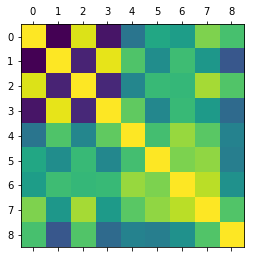

In [23]:
plt.matshow(sd.corr())

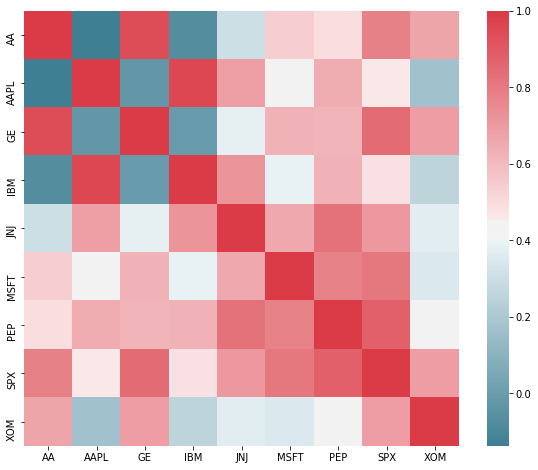

In [24]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = sd.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
sd['AAPL'].rolling(5).mean()

In [25]:
sd['AAPL'].rolling(5).apply(get_range)

0        NaN
1        NaN
2        NaN
3        NaN
4       4.86
5       3.77
6       5.61
7       5.61
8      16.32
9      26.42
10     38.03
11     32.54
12     21.71
13     16.20
14     16.20
15      6.01
16      4.90
17      4.90
18      7.59
19      8.59
20      6.35
21     11.76
22     12.75
23     11.75
24      9.48
25      5.43
26      6.64
27     11.09
28     15.44
29     14.49
       ...  
970    15.94
971    15.94
972    10.78
973    10.09
974    10.09
975     6.66
976     7.14
977    11.82
978    15.48
979    20.56
980    27.01
981    24.15
982    20.49
983    12.95
984    11.63
985    11.63
986    12.88
987     7.29
988    13.73
989    21.85
990    24.66
991    24.51
992    18.07
993     8.82
994     8.45
995    19.01
996    30.49
997    32.39
998    38.63
999    33.19
Name: AAPL, Length: 1000, dtype: float64

In [26]:
sd_apple = sd[['AAPL']].copy()
sd_apple

,AAPL
0,185.09
1,187.00
2,189.95
3,187.44
4,187.87
5,186.18
6,191.79
7,186.30
8,175.47
9,165.37


In [27]:
sd_apple['returns'] = np.log(sd_apple['AAPL'] / sd_apple['AAPL'].shift(1))
sd_apple

,AAPL,returns
0,185.09,NaN
1,187.00,0.010266
2,189.95,0.015652
3,187.44,-0.013302
4,187.87,0.002291
5,186.18,-0.009036
6,191.79,0.029687
7,186.30,-0.029043
8,175.47,-0.059890
9,165.37,-0.059283


In [28]:
sd_apple['SMA_1'] = sd_apple['AAPL'].rolling(60).mean()
sd_apple

,AAPL,returns,SMA_1
0,185.09,NaN,NaN
1,187.00,0.010266,NaN
2,189.95,0.015652,NaN
3,187.44,-0.013302,NaN
4,187.87,0.002291,NaN
5,186.18,-0.009036,NaN
6,191.79,0.029687,NaN
7,186.30,-0.029043,NaN
8,175.47,-0.059890,NaN
9,165.37,-0.059283,NaN


In [29]:
sd_apple['SMA_2'] = sd_apple['AAPL'].rolling(10).mean()
sd_apple

,AAPL,returns,SMA_1,SMA_2
0,185.09,NaN,NaN,NaN
1,187.00,0.010266,NaN,NaN
2,189.95,0.015652,NaN,NaN
3,187.44,-0.013302,NaN,NaN
4,187.87,0.002291,NaN,NaN
5,186.18,-0.009036,NaN,NaN
6,191.79,0.029687,NaN,NaN
7,186.30,-0.029043,NaN,NaN
8,175.47,-0.059890,NaN,NaN
9,165.37,-0.059283,NaN,184.246


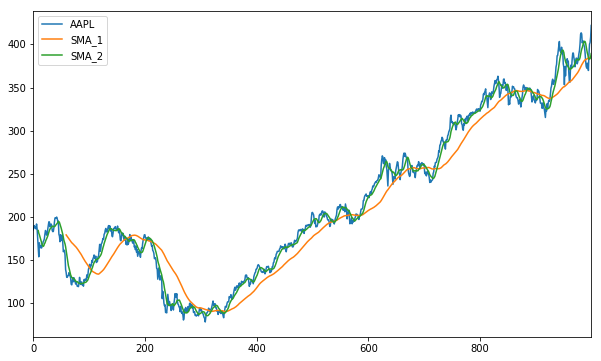

In [30]:
sd_apple[['AAPL','SMA_1', 'SMA_2']].plot(figsize=(10,6))